In [ ]:
IDENTIFIER = "haydn-op1"
path = f"../Pickles/{IDENTIFIER}/{IDENTIFIER}_"

from music21 import converter, instrument, stream, analysis, midi, stream
from LBDM import calculateStrengths
from plots import plotBoundaryStrength
import matplotlib.pyplot as plt
import networkx as nx

import numpy as np
import pandas as pd

score = converter.parse(path + "score.musicxml")
phrases = pd.read_csv(path + "phrases.csv", index_col=[0,1])
G = nx.read_graphml(path + "graph.graphml")

In [ ]:
score.show()

51


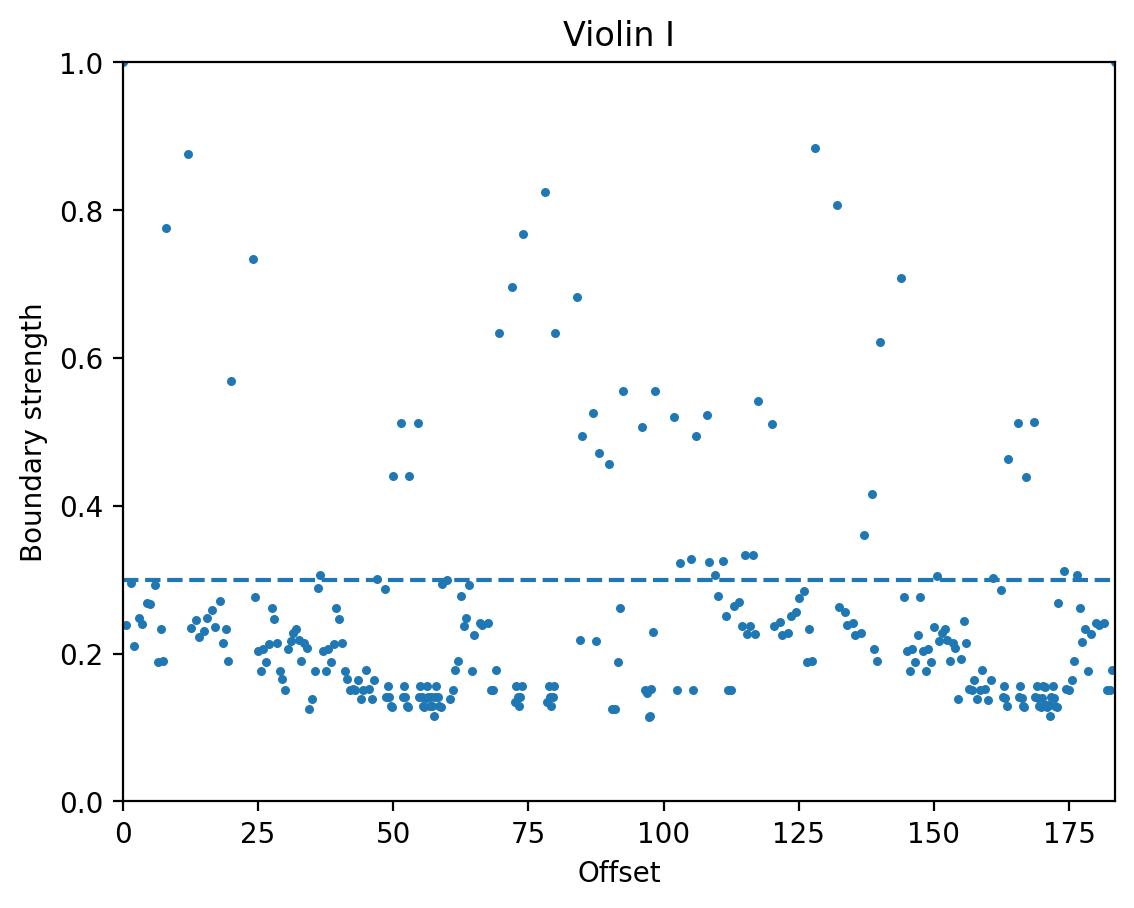

52


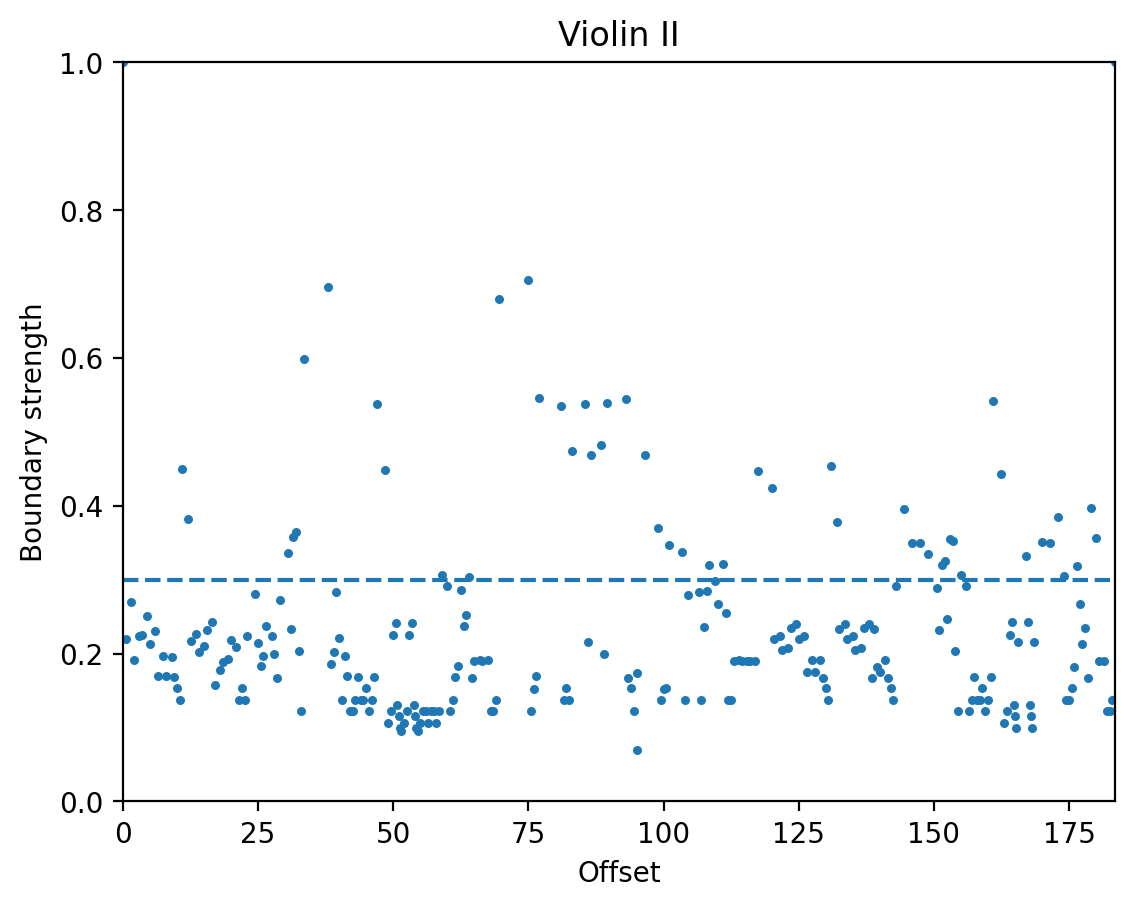

44


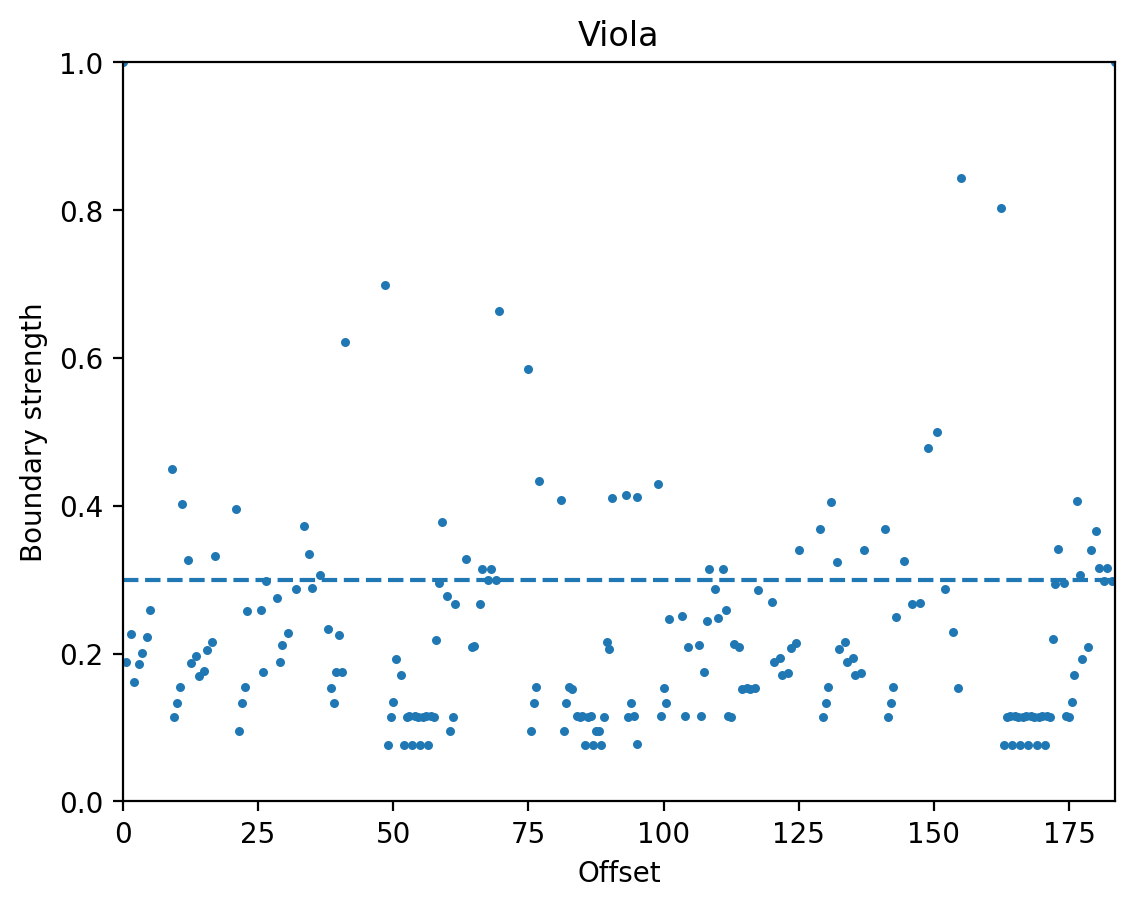

45


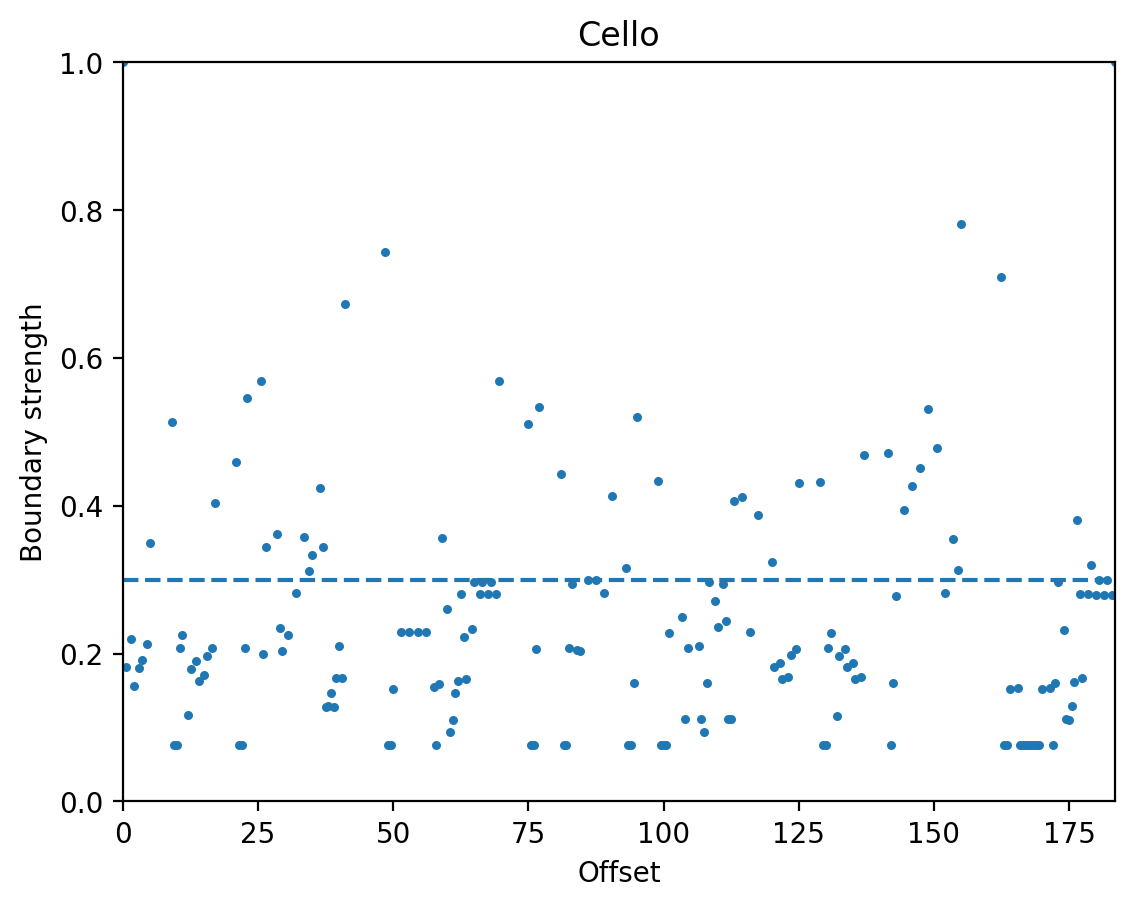

192


In [13]:
count = 0

for part in score.parts:

    df, thresh = calculateStrengths(part, .3, (0.33, 0.66))
    plotBoundaryStrength(df, thresh)
    plt.title(part.id)
    
    boundaries = len(df.query("IsBoundary"))
    print(boundaries)
    count += boundaries
    plt.show()

print(count)

In [ ]:
#score.measures(1, 124).show()
score.measures(1, 124).write(fmt="musicxml", fp="condensed")

In [ ]:
score.write(fmt="musicxml", fp="no-chords")

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, weight="entropy", k=.1)
nx.draw(G, pos=pos, node_size=2, width=.1)

In [ ]:
import itertools as iter

print(len(phrases))

#print(phrases.index.unique(0))

print([i for i in phrases.index])
#print(phrases["Start"])
print(phrases.loc[("Flute", 1), "Entropy"])


#for inst, new_df in phrases.groupby(level=0, sort=False):
    #print(inst)
    #print(new_df.index.get_level_values(1))


In [ ]:
#score = converter.parse(path + "score.musicxml")

df, threshold = calculateStrengths(score.parts[-2], (0.33,0.66))

#saveToMidi(score, "../67-edited.mid")
#score.write(fmt="musicxml", fp=f"../beethoven-op67.musicxml")

# TODO: Check what MIDI sounds like after arrangement (transposing instruments etc.)

In [ ]:
# TODO: Save phrases within a stream (instead of pickle)

bassoon = instrument.Bassoon()
print(bassoon.lowestNote.ps, bassoon.highestNote)

toy = converter.parse("tinyNotation: 4/4 r8 d' d' d' g' a' b' a' g2 r")

def shiftOctave(s: stream.Stream, o: int):
    for n in s.recurse().notes:
        n.octave += o

p = analysis.discrete.Ambitus()
pitchMin, pitchMax = p.getPitchSpan(toy)
print(pitchMin)

shiftOctave(toy, -2)
toy.show()

sp = midi.realtime.StreamPlayer(toy)
sp.play()

print(pitchMin)

In [ ]:
score.write(fmt="musicxml", fp=f"../raiders")

In [ ]:
score = converter.parse("../Pickles/Beethoven/Beethoven_score.musicxml")
#saveToMidi(score, "../Pickles/Beethoven/beethoven.mid")

new = stream.Score()

for part in score.parts:

    print(part.partName)
    part.atSoundingPitch = True
    print(part.atSoundingPitch)

    voices = part.voicesToParts()
    print(len(voices.parts))
    if len(voices.parts) > 1:
        part = part.voicesToParts().parts[0]

    new.append(part)

new.measures(1,7).show()
saveToMidi(new, "../Pickles/Beethoven/sounding_pitch.mid")
#new.write(fmt="musicxml", fp=f"../Pickles/Beethoven/beethoven.musicxml")